
# Project: Investigate a Dataset - [noshowappointments dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

#### ‘ScheduledDay’ tells us on what day the patient set up their appointment.
#### ‘Neighborhood’ indicates the location of the hospital.
#### ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

### Question(s) for Analysis

#### Question(1):The Relation Between No-Show & Age
#### Question(2):The Relation Between No-Show & Gender
#### Question(3):The Relation Between No-Show & Handcap
#### Question(4):The Relation Between No-Show & Scholarship
#### Question(5):The Relation Between No-Show & Diabetes


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

#### In Data Wrangling I didn't found any 'null' values to remove,and also didn't find any duplicated values.





In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Function

#### This function visualize the data ..

In [7]:
def visualize(width,height,df1,df2,color,xrotation,title):
        plt.figure(figsize=(width,height))
        sns.set_theme(style="darkgrid")
        ax = sns.countplot(x=df1,hue=df2, data=df_2, palette = color)
        plt.xticks(rotation=xrotation)
        ax.set_title(title,fontsize=15)
        ax.set_ylabel("Patients count");


### Data Cleaning

#### In Data Cleaning I renamed the column ("SMS_recieved" to "SMS-recieved") to facilitate the visualization 

In [8]:
# Here I make range for the age 
df_2=df[(df["Age"]>6)&(df["Age"]<100)]

#### We need to know  the data statistics

In [9]:
df_2.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,9.726300e+04,9.726300e+04,97263.000000,97263.000000,97263.000000,97263.000000,97263.000000,97263.000000,97263.000000
mean,1.474068e+14,5.675211e+06,41.807563,0.101107,0.224124,0.081634,0.034525,0.024943,0.327298
std,2.560194e+14,7.155887e+04,20.482292,0.301472,0.417006,0.273808,0.182574,0.170803,0.469230
min,3.921784e+04,5.030230e+06,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.156843e+12,5.640358e+06,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.162529e+13,5.680684e+06,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433715e+13,5.725441e+06,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999686e+14,5.790484e+06,99.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### We need to check if there is Nan values (any missing data)

In [10]:
df_2.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### we can also check if there is dublicated values in our dataset

In [11]:
sum(df_2.duplicated())

0

#### Here I renamed the column 'Hipertension'to 'Hypertension'

In [12]:
df_2 = df_2.rename(columns={'Hipertension' : 'Hypertension'})

#### let's show the first five rows of the dataset after cleaning

In [13]:
df_2.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


####  I renamed the column ("SMS_recieved" to "SMS-recieved") to facilitate the visualization

In [14]:
df_2 = df_2.rename(columns={'SMS_received' : 'SMS-received'})

#### let's show the first five rows of the dataset after cleaning again

In [15]:
df_2.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS-received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Here we count the number of patients who attend the appointment

In [16]:
show=df_2[df_2['No-show']=='No']

In [17]:
show.count()

PatientId         77448
AppointmentID     77448
Gender            77448
ScheduledDay      77448
AppointmentDay    77448
Age               77448
Neighbourhood     77448
Scholarship       77448
Hypertension      77448
Diabetes          77448
Alcoholism        77448
Handcap           77448
SMS-received      77448
No-show           77448
dtype: int64

#### Here we count the number of patients who attend the appointment

In [18]:
noshow=df_2[df_2['No-show']=='Yes']

In [19]:
noshow.count()

PatientId         19815
AppointmentID     19815
Gender            19815
ScheduledDay      19815
AppointmentDay    19815
Age               19815
Neighbourhood     19815
Scholarship       19815
Hypertension      19815
Diabetes          19815
Alcoholism        19815
Handcap           19815
SMS-received      19815
No-show           19815
dtype: int64

#### we can display the dataset for patients who attend the appointment

In [20]:
show

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS-received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


#### we can display the dataset for patients who attend the appointment

In [21]:
noshow

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS-received,No-show
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110492,6.456342e+14,5786741,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,8.544295e+13,5779046,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110515,6.456342e+14,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


<a id='eda'></a>
## Exploratory Data Analysis









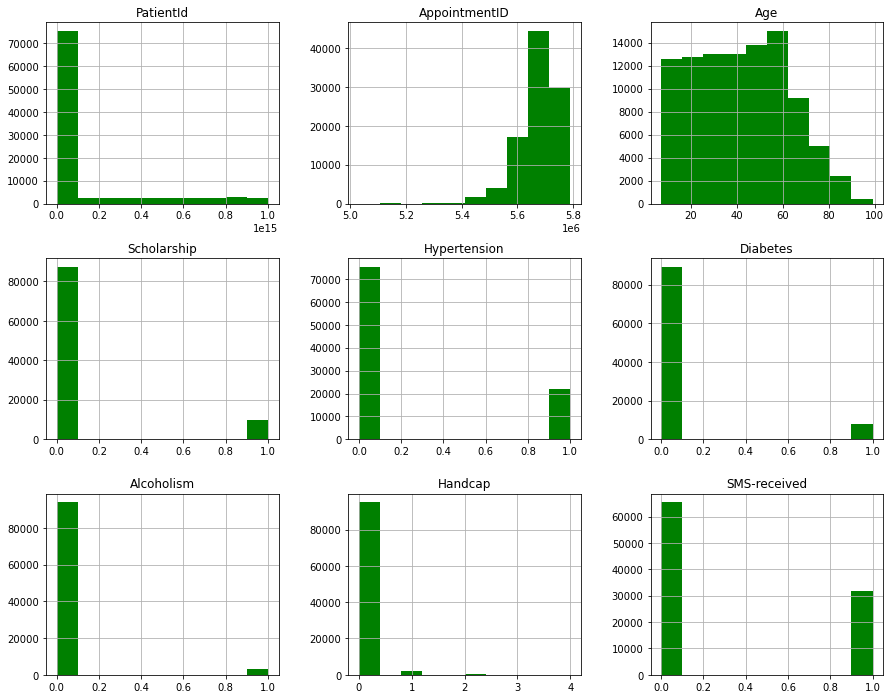

In [22]:
df_2.hist(figsize=(15,12),grid=True, color = "g");

### Research Question 1 (The Relation Between No-Show & Age)

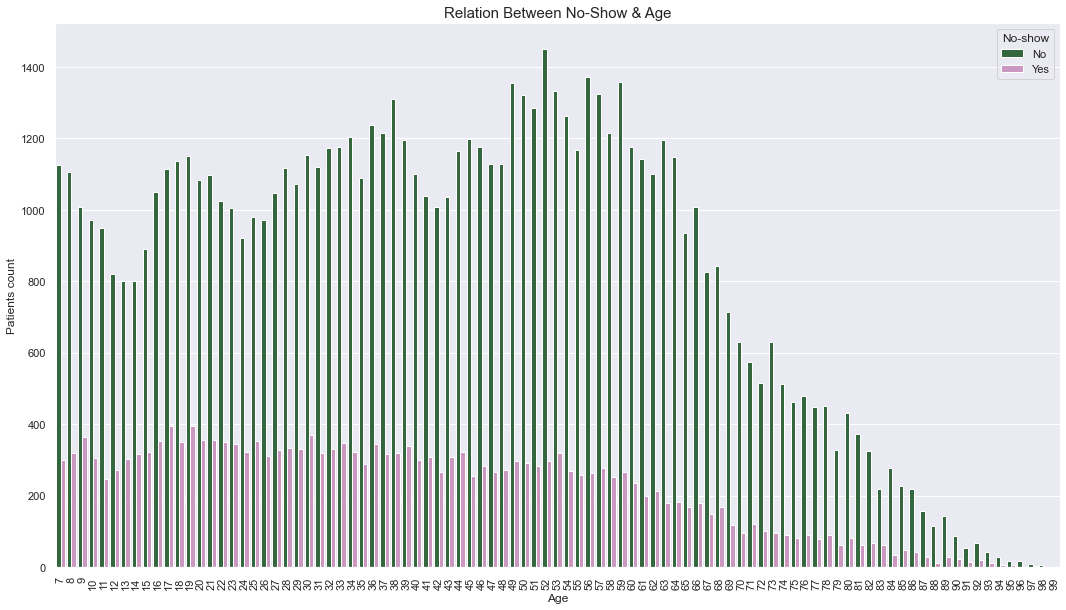

In [23]:
# plt.figure(figsize=(18,10))
# sns.set_theme(style="darkgrid")
# ax = sns.countplot(x=df_2.Age,hue=df_2["No-show"], data=df_2, palette = "cubehelix")
# plt.xticks(rotation=90)
# ax.set_ylabel("Patients count");
visualize(18,10,df_2.Age,df_2["No-show"],"cubehelix",90,"Relation Between No-Show & Age")

#### I concluded that patients under 40 years some of them attended and the other didn't, and patient above 40 attended


### Research Question 2 (The Relation Between No-Show & Gender)

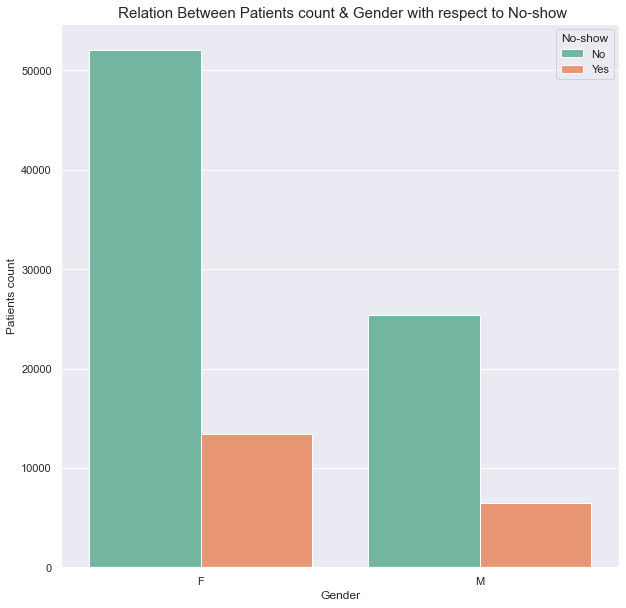

In [24]:
visualize(10,10,df_2.Gender,df_2["No-show"],"Set2",0," Relation Between Patients count & Gender with respect to No-show")

#### I concluded that the most Gender that attended is Female

### Research Question 3(The Relation Between No-Show & Handcap)

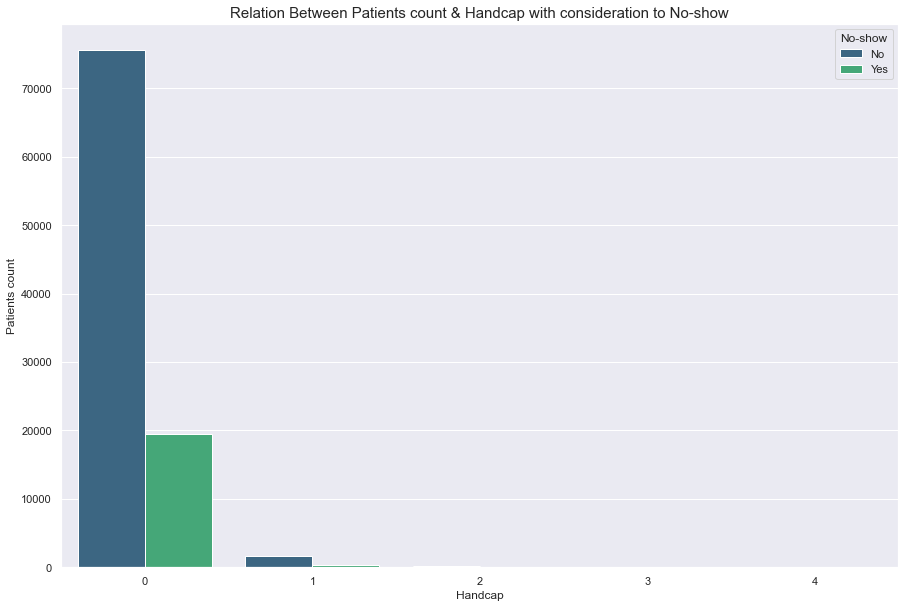

In [25]:
visualize(15,10,df_2.Handcap,df_2["No-show"],"viridis",0,"Relation Between Patients count & Handcap with consideration to No-show")

#### I concluded that the most attended are people who didn't suffer handcap









### Research Question 4 (The Relation Between No-Show & Scholarship)

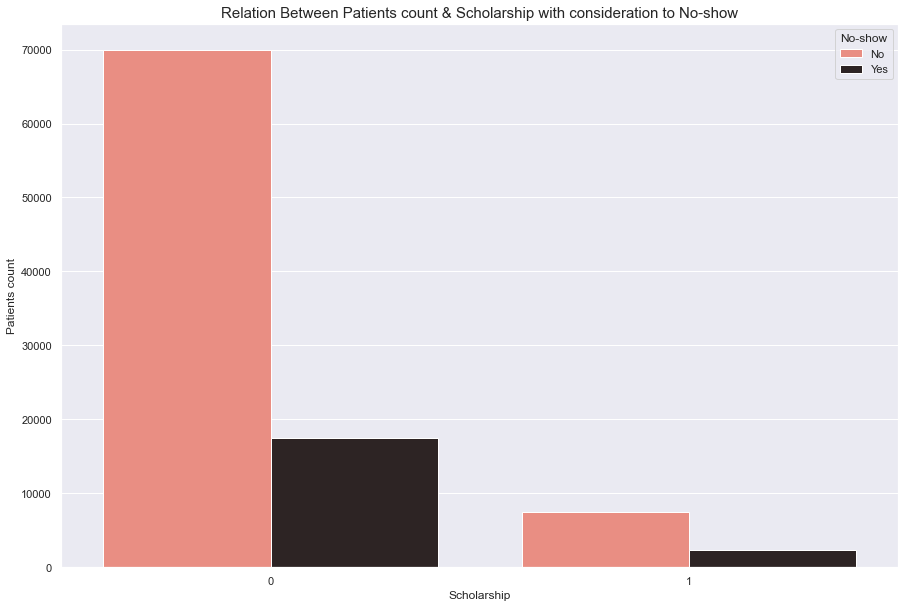

In [26]:
visualize(15,10,df_2.Scholarship,df_2["No-show"],"dark:salmon_r",0,"Relation Between Patients count & Scholarship with consideration to No-show")

#### I concluded that the most attended are people who didn't have Scholarship




### Research Question 5 (The Relation Between No-Show & Diabetes)

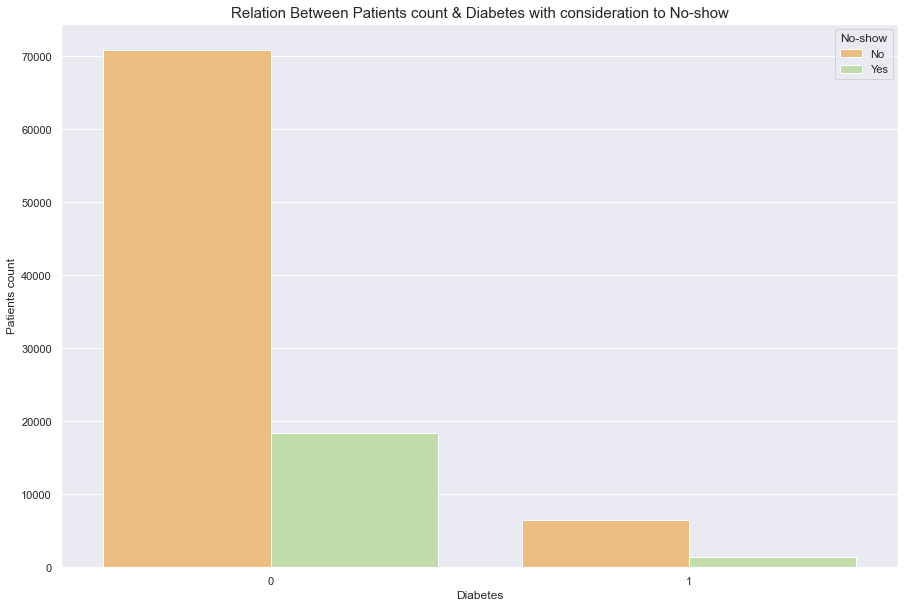

In [27]:
visualize(15,10,df_2.Diabetes,df_2["No-show"],"Spectral",0,"Relation Between Patients count & Diabetes with consideration to No-show")

#### I concluded that the most attended are people who didn't suffer Diabetes



<a id='conclusions'></a>
## Conclusions

#### I concluded that patients under 40 years some of them attended and the other didn't, and patient above 40 attended
#### I concluded that the most Gender that attended is Female
#### I concluded that the most attended are people who didn't suffer handcap
#### I concluded that the most attended are people who didn't have Scholarship
#### I concluded that the most attended are people who didn't suffer Diabetes



## Limitations

#### In Data Wrangling I didn't found any 'null' values to remove,and also didn't find any duplicated values.
#### In Data Cleaning I renamed the column ("SMS_recieved" to "SMS-recieved") to facilitate the visualization